In [2]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload

from brian2 import *

from my_code.aux_functions import *
from my_code.parameters import *
from my_code.network import *
from my_code.tests import *
from my_code.MyPlots import *
import my_code.MyPlots as Mplt

In [3]:
# THE CURRENT THRESHOLD
print('current threshold:',(-60*mV+50*mV)*10*nS)
# POTENTIAL THRESHOLD
print('potential threshold:',100*pA/(10*nS)-60*mV)

current threshold: -100. pA
potential threshold: -50. mV


# Set Parameters

In [454]:
run_hist = 0
stimulation = 'none'
net_params = get_default_net_params()
test_params = get_dft_test_params()

net_params['g_leak_p'].set_param(10)
net_params['tau_l'].set_param(1)
net_params['mem_cap_p'].set_param(200)
initial_v_noise = 10
# initial_v_noise = 0
initial_adapt_noise = 100
# initial_adapt_noise = 0

equal_noise = False
net_params['curr_bg_nosie'].set_param(False)
net_params['curr_bg_equal_to_pop'].set_param(equal_noise)
net_params['curr_bg_equal_to_neurons'].set_param(equal_noise)
net_params['curr_bg_base_p'].set_param(0)
net_params['curr_bg_base_b'].set_param(0)
net_params['curr_bg_noise_amp_p'].set_param(0)
net_params['curr_bg_noise_amp_b'].set_param(0)
net_params['curr_bg_noise_dt'].set_param(.1)

test_params['sim_dt'].set_param(.1)

# --------------------------------------
net_params['prob_pp'].set_param(0.01)
# net_params['prob_pb'].set_param(0.5)

net_params['curr_bg_p'].set_param(120)
net_params['curr_bg_b'].set_param(0)

net_params['g_pp'].set_param(0.1)
net_params['g_bp'].set_param(0)
net_params['g_pb'].set_param(0)
net_params['g_bb'].set_param(0)

# net_params['tau_d_p'].set_param(2)
# net_params['tau_d_b'].set_param(1.5)

net_params['J_spi_p'].set_param(50)
net_params['tau_adapt_p'].set_param(250)

# net_params['J_spi_b'].set_param(0)
# net_params['tau_adapt_b'].set_param(250)

net_params['n_e_p'].set_param(500)
net_params['poisson_rate_p'].set_param(6)
net_params['tau_d_e_p'].set_param(2)
net_params['prob_pe'].set_param(0.5)
net_params['g_pe'].set_param(0)

net_params['n_e_b'].set_param(500)
net_params['poisson_rate_b'].set_param(5)
net_params['tau_d_e_b'].set_param(2)
net_params['prob_be'].set_param(0.5)
net_params['g_be'].set_param(0)

sim_time = 6
test_params['sim_time'].set_param(sim_time)
test_params['stim_strength'].set_param(0)
test_params['min_peak_height'].set_param(20)
test_params['gauss_window'].set_param(3)
# test_params['mean_peak_distant'].set_param(0)

# Set Model and Monitors

In [455]:
currents_to_record = {'curr_p': True, 'curr_b': True, 'curr_bg': True, 'curr_l': True, 'curr_net': True, 'curr_e': True}

built_network, used_net_params = build_network(net_params,initial_condition='none')
built_network, test_params = record_network(built_network, used_net_params, test_params)
built_network, test_params = record_p_currents(built_network, used_net_params, test_params,currents_to_record)
built_network, test_params = record_b_currents(built_network, used_net_params, test_params, currents_to_record)
built_network, test_params = record_p_v(built_network, used_net_params, test_params)

BP Model with Adaptation
Neuron type: adaptive leaky integrate-and-fire
Total number of synapses


P->P: 669,772
B->P: 553,659
P->B: 221,323
B->B: 3,695
E->P: 2,050,091
E->B: 33,664


In [456]:
# set the initial value for membrane potential
built_network['pop_p'].v = built_network['pop_p'].e_rever-initial_v_noise*rand(8200)*mV
built_network['pop_b'].v = built_network['pop_b'].e_rever-initial_v_noise*rand(135)*mV

# set the initial value for adatation current
built_network['pop_p'].curr_adapt = initial_adapt_noise*rand(8200)*pA
built_network['pop_b'].curr_adapt = 0*rand(135)*pA

# Run the model and get Monitos

In [457]:
tested_network, test_params = run_test(built_network, test_params, used_net_params, stimulation = stimulation)
ready_monitors, test_data, test_params = prepare_test(tested_network, test_params, used_net_params)
ready_monitors = average_p_currents(tested_network, ready_monitors, currents_to_record)
ready_monitors = average_b_currents(tested_network, ready_monitors, currents_to_record)

default clock dt: 100. us


Starting simulation at t=0. s for a duration of 2. s
2. s (100%) simulated in 6s
Starting simulation at t=2. s for a duration of 6. s
3.0544 s (50%) simulated in 10s, estimated 10s remaining.
6. s (100%) simulated in 19s


# Graph parameters

In [494]:
currents_to_plot = {'curr_adp': True,'curr_p': True, 'curr_b': True, 'curr_bg': True, 'curr_l': True, 'curr_net': True, 'curr_e': True}
# currents_to_plot['curr_adp'] = False 
# currents_to_plot['curr_p'] = False
# currents_to_plot['curr_b'] = False
currents_to_plot['curr_bg'] = False
currents_to_plot['curr_l'] = False
currents_to_plot['curr_net'] = False
# currents_to_plot['curr_e'] = False

start, end = 0, (sim_time+2)
x_axis_limit = [start, end]
# x_axis_limit = [0,2]
# x_axis_limit = [4.8,5]

curr_y_limit = None
# curr_y_limit = [-20,500]

y_axis_limit = None
y_axis_limit= [0,200]

## Currents

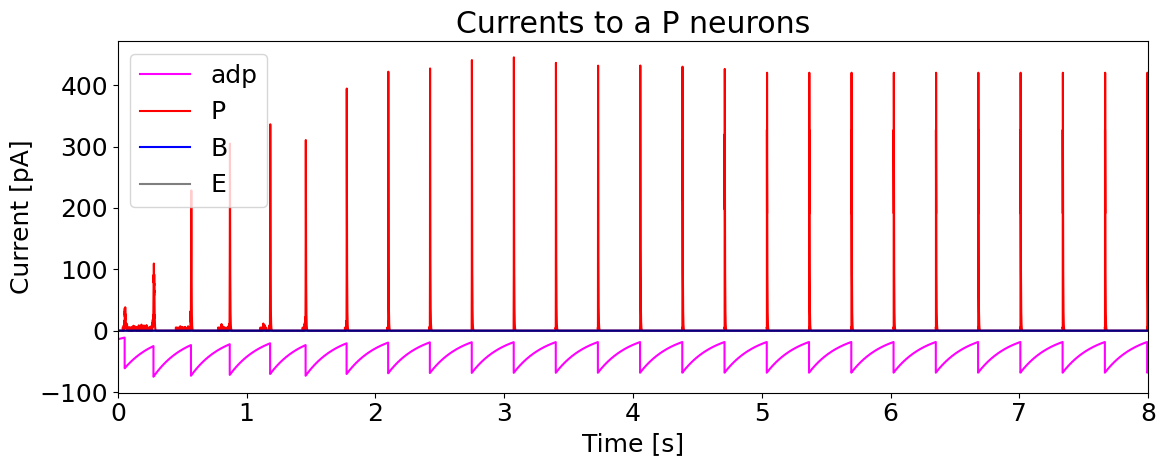

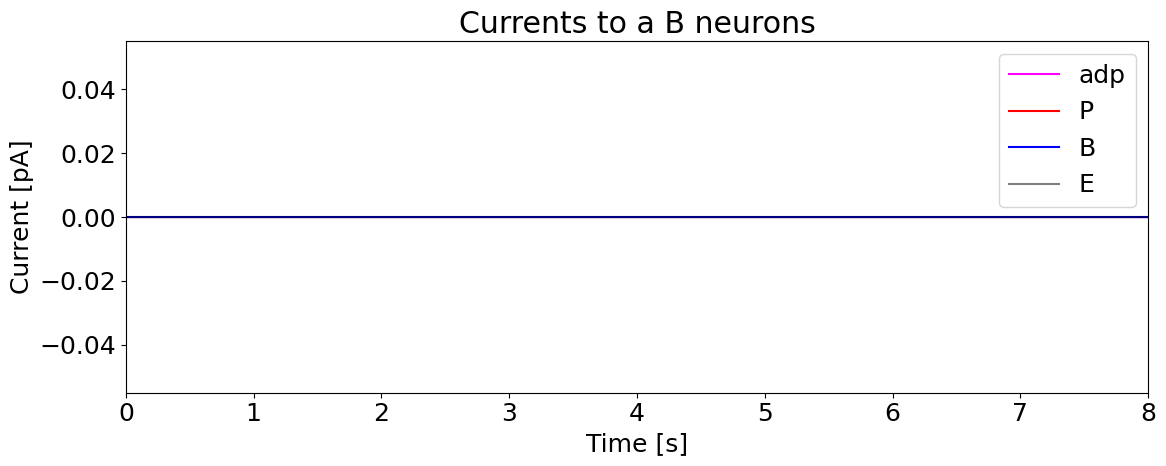

In [495]:
reload(Mplt)
Mplt.plot_currents_P_neurons(built_network,currents_to_plot, x_axis_limit,curr_y_limit)
Mplt.plot_currents_B_neurons(built_network,currents_to_plot, x_axis_limit,curr_y_limit)

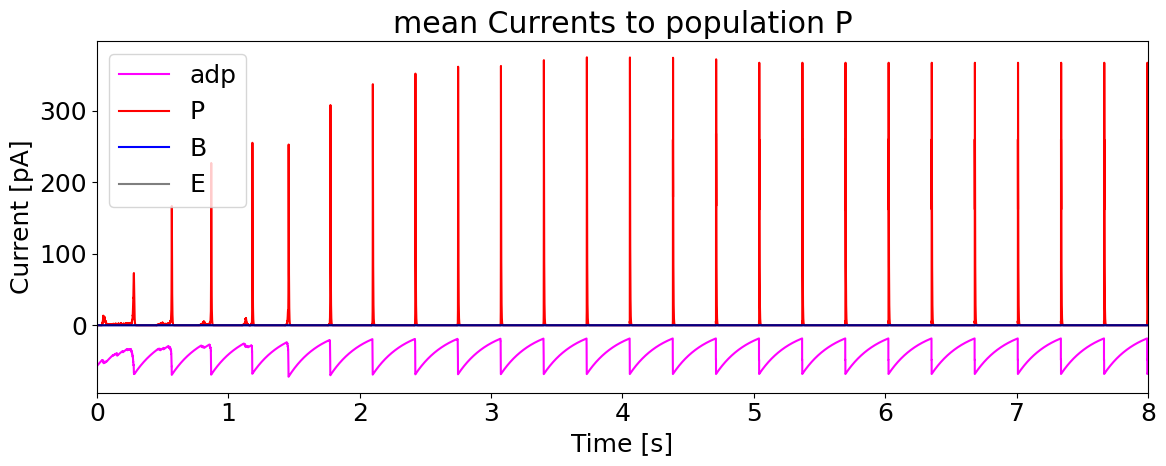

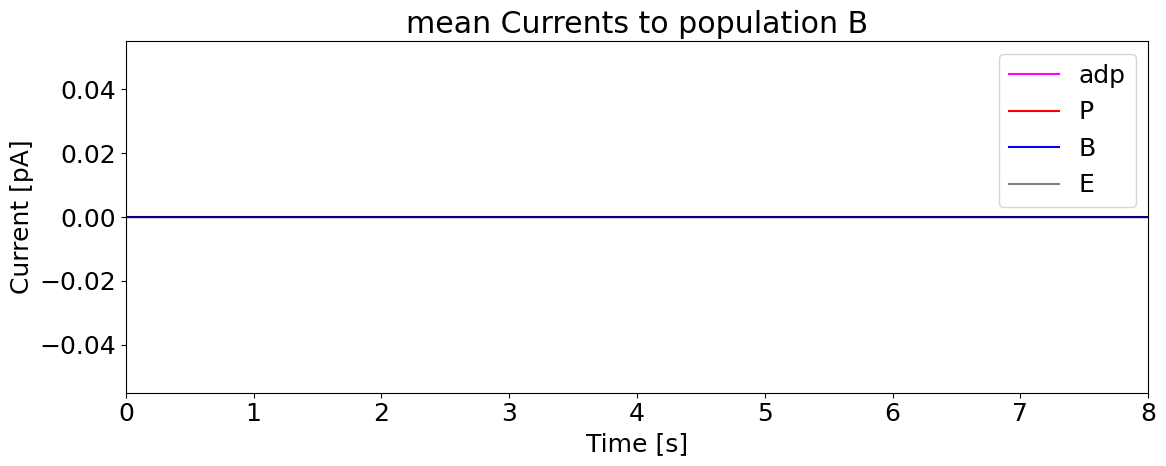

In [496]:
reload(Mplt)
Mplt.plot_current_P_pop(ready_monitors, currents_to_plot, x_axis_limit,curr_y_limit)
Mplt.plot_current_B_pop(ready_monitors, currents_to_plot, x_axis_limit,curr_y_limit)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


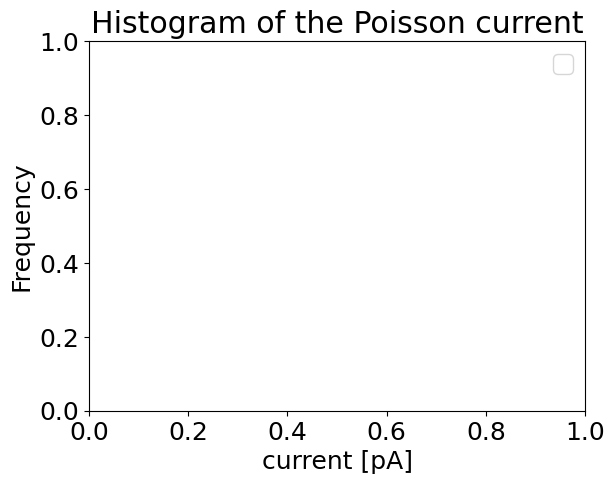

In [497]:
reload(Mplt)
dist_to_plot = {'P':net_params['g_pe'].get_param()/nS,'B':net_params['g_be'].get_param()/nS}
Mplt.plot_poisson_dist(ready_monitors,dist_to_plot)

## Potential Distribution

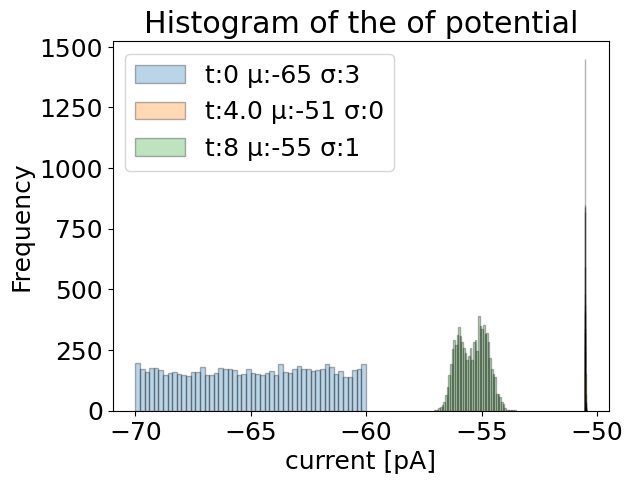

In [498]:
reload(Mplt)
Mplt.plot_potential_distriution(built_network,x_axis_limit)

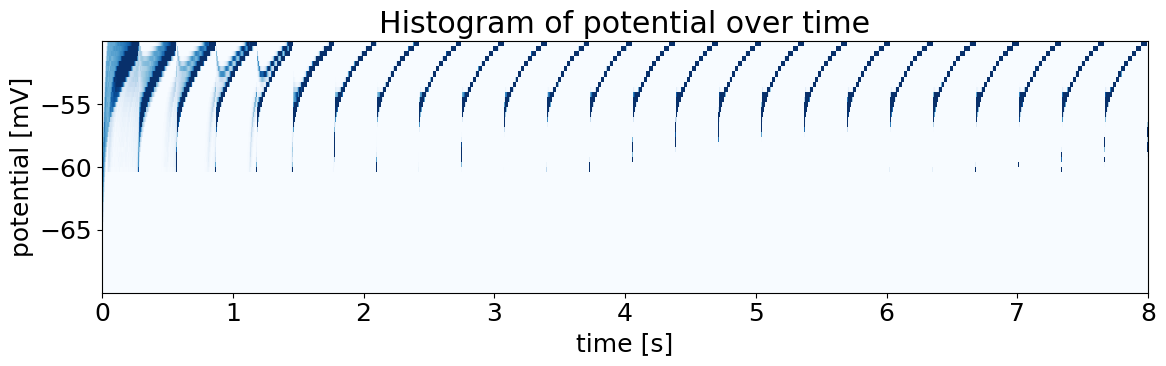

In [513]:
reload(Mplt)
if not run_hist: hist_data = Mplt.get_hist_data(built_network)
Mplt.plot_potential_dist(hist_data, sim_time, x_axis_limit)
run_hist += 1

## Firing rates

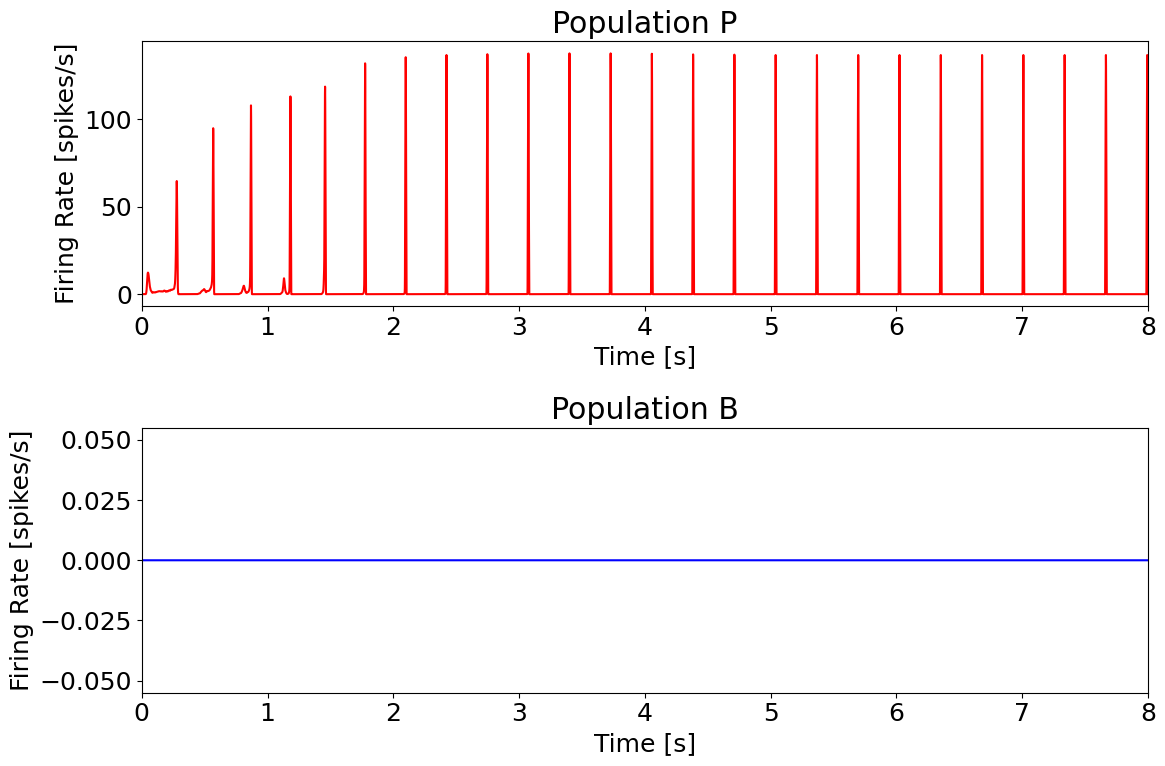

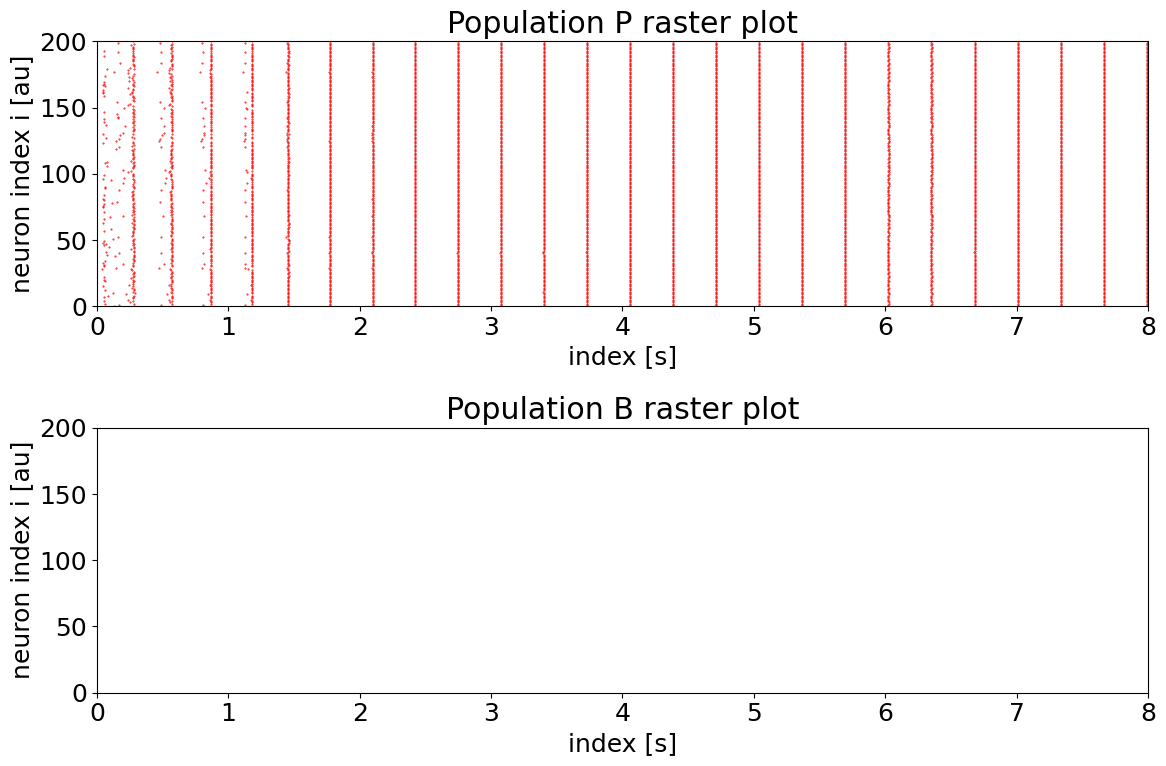

In [514]:
reload(Mplt)
Mplt.plot_population_fr(ready_monitors,x_axis_limit)
Mplt.plot_rasterplot(tested_network,x_axis_limit, y_axis_limit)

In [515]:
print('P firing overall:',"%.2f" % np.mean(test_data['mean_rate_p']),'spikes/s')
print('B firing overall:',"%.2f" % np.mean(test_data['mean_rate_b']),'spikes/s')

P firing overall: 3.17 spikes/s
B firing overall: 0.00 spikes/s


## Membrane Potential

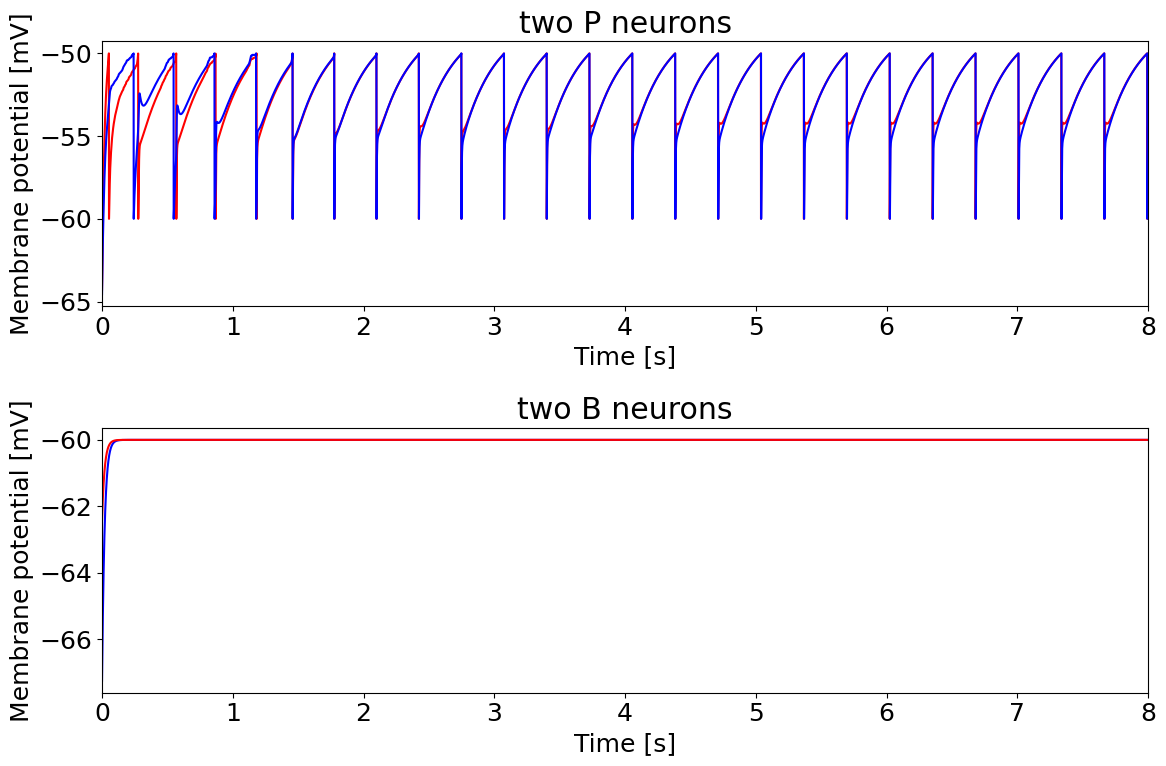

In [516]:
reload(Mplt)
Mplt.plot_mpt_neuron(built_network,x_axis_limit)

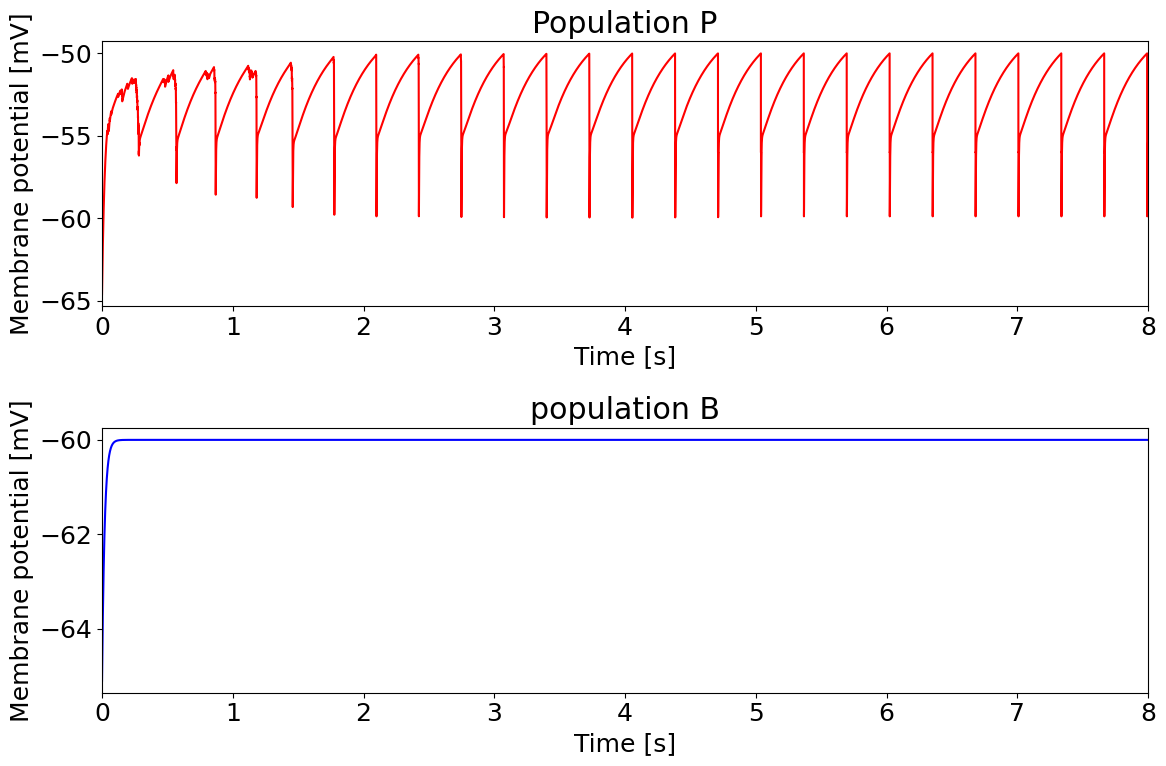

In [517]:
reload(Mplt)
Mplt.plot_mpt_pop(ready_monitors,x_axis_limit)

## LFP

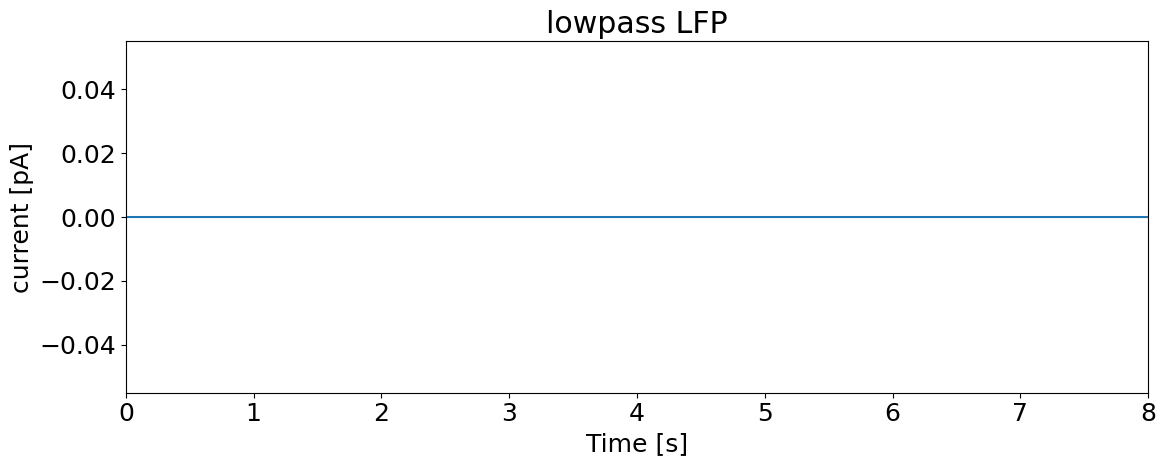

In [518]:
reload(Mplt)
Mplt.plot_lowpass_LFP(ready_monitors,x_axis_limit)

In [519]:
print('number of events:',test_data['n_events'])
print('inter event intervals:', test_data['event_intervals'])

number of events: 0


KeyError: 'event_intervals'

In [ ]:
print('Event duration:',"%.1f" % np.mean(test_data['event_durations']),'ms')
print('P firing overall:',"%.2f" % np.mean(test_data['mean_rate_p']),'spikes/s')
print('B firing overall:',"%.2f" % np.mean(test_data['mean_rate_b']),'spikes/s')
print('P firing non-states:',"%.2f" % np.mean(test_data['rtm_p_nswr']),'spikes/s')
print('B firing non-states:',"%.2f" % np.mean(test_data['rtm_b_nswr']),'spikes/s')
print('P firing event:',"%.2f" % np.mean(test_data['rtm_p_event']),'spikes/s')
print('B firing event:',"%.2f" % np.mean(test_data['rtm_b_event']),'spikes/s')
print('Peak time B:',"%.1f" % np.mean(0.1*test_data['rtm_b_event_argmax']),'ms')
print('Peak time P:',"%.1f" % np.mean(0.1*test_data['rtm_p_event_argmax']),'ms')

Event duration: 161.8 ms
P firing overall: 2.64 spikes/s
B firing overall: 76.90 spikes/s
P firing non-states: nan spikes/s
B firing non-states: nan spikes/s
P firing event: 2.79 spikes/s
B firing event: 81.17 spikes/s
Peak time B: 87.1 ms
Peak time P: 101.3 ms


In [ ]:
from scipy.stats import shapiro

# Perform the Shapiro-Wilk test
statistic, p_value = shapiro(ready_monitors['stm_p_e'][1])

# Print the results
print(f"Shapiro-Wilk statistic: {statistic}")
print(f"P-value: {p_value}")

# Check if the data follows a normal distribution based on the p-value
alpha = 0.05
if p_value < alpha:
    print("The data does not follow a normal distribution.")
else:
    print("The data follows a normal distribution.")

Shapiro-Wilk statistic: 0.9566158056259155
P-value: 0.0
The data does not follow a normal distribution.


In [ ]:
# from scipy.stats import poisson, chisquare
# observed, ddd = np.histogram(ready_monitors['stm_p_e'][1], bins=np.arange(min(ready_monitors['stm_p_e'][1]), max(ready_monitors['stm_p_e'][1]+2)))



# # Calculate expected frequencies assuming a Poisson distribution
# lam = np.mean(ready_monitors['stm_p_e'][1])
# expected = poisson.pmf(np.arange(min(ready_monitors['stm_p_e'][1]), max(ready_monitors['stm_p_e'][1])+1), lam) * len(ready_monitors['stm_p_e'][1])

# shape(observed), shape(expected)
# # Perform the Chi-squared test
# chi2_stat, p_value = chisquare(observed, expected)

# # Print the results
# print(f"Chi-squared statistic: {chi2_stat}")
# print(f"P-value: {p_value}")

# # Check if the ready_monitors['stm_p_e'][1] follows a Poisson distribution based on the p-value
# alpha = 0.05
# if p_value < alpha:
#     print("The ready_monitors['stm_p_e'][1] does not follow a Poisson distribution.")
# else:
#     print("The ready_monitors['stm_p_e'][1] follows a Poisson distribution.")